# Conhecendo a base de dados

## Importando os dados


In [ ]:
import pandas as pd

In [ ]:
url = '../files/aluguel.csv'
#pd.read_csv(url)
#ler csv e armazenar em um df
dados = pd.read_csv(url, sep=';')
dados

In [ ]:
#primeiras 10 linhas
dados.head(10)

In [ ]:
#ultimas linhas
dados.tail()

In [ ]:
#verificando que é uma variavel do type dataframe
type(dados)

## Características gerais da base de dados

In [ ]:
#quantidade de linhas e colunas
dados.shape

In [ ]:
#verificando quais colunas existem
dados.columns

In [ ]:
#verificando qual tipagem dos dados
dados.info()

In [ ]:
#trazendo apenas uma coluna do dataframe
dados['Tipo']

In [ ]:
#trazedo duas colunas 
dados[['Quartos', 'Valor']]

# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [ ]:
dados.head()

In [ ]:
#media do campo valor
dados['Valor'].mean()

In [ ]:
#agrupando por tipo e sumando apenas valores numericos
dados.groupby('Tipo').mean(numeric_only=True)

In [ ]:
#agrupand por tipo e somando apenas valor
dados.groupby('Tipo')['Valor'].mean()

In [ ]:
#agrupando tipo, somando valores e ordenando do maior para menor
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor',ascending=0)

In [ ]:
#guardando informações em outra df
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

#plotando grafico de barras
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

## Removendo os imóveis comerciais

In [ ]:
#verificamos os tipos de imoveis 
dados.Tipo.unique()

In [ ]:
#criando uma lista com os tipos comerciais que não serão usados
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [ ]:
#validando query
dados.query('@imoveis_comerciais in Tipo')

In [ ]:
#validando query
dados.query('@imoveis_comerciais not in Tipo')

In [ ]:
#criando df com imoveis que serão usados para nnalise
df = dados.query('@imoveis_comerciais not in Tipo')
df.head()

In [ ]:
#verificando os tipos de imoveis que ficaram
df.Tipo.unique()

In [ ]:
#agrupando tipo dos imoveis residenciais por valor
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

#protando grafico
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [ ]:
df.Tipo.unique()

In [ ]:
#verificando discrepancia dos valores distribuidos
df.Tipo.value_counts(normalize=True)

In [ ]:
#transformando em data frame
df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

In [ ]:
#guardando distribuição dos imoveis por tipo em uma nova df
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

#platando grafico
df_percentual_tipo.plot(kind='bar', figsize=(14, 10), color ='green',
                        xlabel = 'Tipos', ylabel = 'Percentual');

### **Selecionando apenas os imóveis do tipo apartamento**

In [ ]:
#selecionando apenas apartamentos
df.query('Tipo == "Apartamento"')

In [ ]:
#criando df
df = df.query('Tipo == "Apartamento"')
df.head()

# Tratando e filtrando os dados

## Lidando com dados nulos

In [ ]:
#validação de todas  colunas 
df.isnull()

In [ ]:
#somando nulos por tipo
df.isnull().sum()

In [ ]:
#transformndo nulo em 0
df.fillna(0)

In [ ]:
#atribuindo a df
df = df.fillna(0)

In [ ]:
#validando tratamento de nulos
df.isnull().sum()

## Removendo registros

In [ ]:
#removendo valores zerados
df.query('Valor == 0 | Condominio == 0')

In [ ]:
#criando uma serie para pegar os registros que serão excluidos
df.query('Valor == 0 | Condominio == 0').index

In [ ]:
#atribuidos a df
registros_a_remover = df.query('Valor == 0 | Condominio == 0').index

In [ ]:
#deletando direto na df
df.drop(registros_a_remover, axis=0, inplace=True)

In [ ]:
#validando
df.query('Valor == 0 | Condominio == 0')

In [ ]:
df.head()

In [ ]:
#tipo ficou  com um unico valor
df.Tipo.unique()

In [ ]:
#exclui coluna
df.drop('Tipo', axis=1, inplace=True)

In [ ]:
df.head()

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [ ]:
df['Quartos'] == 1

In [ ]:
selecao1 = df['Quartos'] == 1
df[selecao1]

In [ ]:
selecao2 = df['Valor'] < 1200
df[selecao2]

In [ ]:
selecao_final = (selecao1) & (selecao2)
df[selecao_final]

In [ ]:
df_1 = df[selecao_final]

### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [ ]:
selecao = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)
df[selecao]

In [ ]:
df_2 = df[selecao]

## Salvando os dados

In [ ]:
df.to_csv('../files/dados_apartamentos.csv')

In [ ]:
#salvou com coluna index
pd.read_csv('../files/dados_apartamentos.csv')

In [ ]:
#salvou sem coluna index
df.to_csv('../files/dados_apartamentos.csv', index=False)

In [ ]:
pd.read_csv('../files/dados_apartamentos.csv')

In [ ]:
df.to_csv('../files/dados_apartamentos.csv', index=False, sep=';')

In [ ]:
pd.read_csv('../files/dados_apartamentos.csv')

In [ ]:
pd.read_csv('../files/dados_apartamentos.csv', sep=';')

# Manipulando os dados

## Criando colunas numéricas

In [ ]:
##url = '../files/aluguel.csv'
##dados = pd.read_csv(url, sep=';')
##dados.head()
dados.head()

In [ ]:
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

In [ ]:
dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']
dados.head()

## Criando colunas categóricas

In [ ]:
dados['Descricao'] = 'Ap em ' + dados['Bairro']
dados.head()

In [ ]:
dados['Descricao'] = 'AP em ' + dados['Bairro'] + ' com '  + \
                     dados['Quartos'].astype(str) + ' quarto(s) '  + \
                     ' e '  + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'
dados.head()

In [ ]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: "Sim" if x > 0 else "Não")
dados.head()

In [ ]:
dados.to_csv('../files/dados_completos_dev.csv', index=False, sep=';')


# Manipulando dados com CSV, EXCEL, HTML, XML E SQLITE

## **Aula 1 - Fazendo leitura de arquivos CSV**

Dados:
- https://github.com/alura-cursos/Pandas/blob/main/superstore_data.csv
- https://github.com/alura-cursos/Pandas/blob/main/superstore_data_ponto_virgula.csv

### **Lendo arquivos CSV**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/Pandas/main/superstore_data.csv'

In [ ]:
dados = pd.read_csv(url)

In [ ]:
dados.head()

In [ ]:
url_2 = 'https://raw.githubusercontent.com/alura-cursos/Pandas/main/superstore_data_ponto_virgula.csv'

In [ ]:
dados_ponto_virgula = pd.read_csv(url_2)

In [ ]:
dados_ponto_virgula.head()

### **Parâmetros da função read_csv**
Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
dados_ponto_virgula = pd.read_csv(url_2, sep = ';')

In [ ]:
dados_ponto_virgula

In [ ]:
dados_primeiras_linhas = pd.read_csv(url,nrows=5)
dados_primeiras_linhas

In [ ]:
dados_selecao = pd.read_csv(url, usecols=['Id', 'Year_Birth', 'Income'])
dados_selecao

In [ ]:
dados_selecao = pd.read_csv(url, usecols=[0,1,4])
dados_selecao

### **Escrevendo arquivos CSV**

Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
dados_selecao.to_csv('clientes_mercado.csv')

In [ ]:
clientes_mercado = pd.read_csv('/content/clientes_mercado.csv')
clientes_mercado

In [ ]:
dados_selecao.to_csv('dados_mercado.csv', index=False)

In [ ]:
dados_mercado = pd.read_csv('/content/dados_mercado.csv')
dados_mercado

## **Aula 2 - Utilizando planilhas**

Dados: https://github.com/alura-cursos/Pandas/blob/main/emissoes_CO2.xlsx

### **Lendo arquivos Excel**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/alura-cursos/Pandas/blob/main/emissoes_CO2.xlsx?raw=True'

In [ ]:
dados_co2 = pd.read_excel(url)

In [ ]:
dados_co2.head()

In [ ]:
pd.ExcelFile(url).sheet_names

### **Parâmetros da função read_excel**

Documentação: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
percapita = pd.read_excel(url, sheet_name='emissoes_percapita')

In [ ]:
percapita.head()

In [ ]:
fontes = pd.read_excel(url, sheet_name='fontes')

In [ ]:
fontes.head()

In [ ]:
intervalo = pd.read_excel(url, sheet_name='emissoes_C02', usecols= 'A:D')

In [ ]:
intervalo

In [ ]:
intervalo_2 = pd.read_excel(url, sheet_name='emissoes_C02', usecols= 'A:D', nrows=10)

In [ ]:
intervalo_2

### **Escrevendo arquivos Excel**

In [ ]:
percapita.to_excel('co2_percapita.xlsx', index=False)

In [ ]:
pd.read_excel('/content/co2_percapita.xlsx')

### **Lendo dados do Google Planilhas**

link da planilha: https://docs.google.com/spreadsheets/d/1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog/edit?usp=sharing

In [ ]:
sheet_id = '1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet'

In [ ]:
dados_co2_sheets = pd.read_csv(url)

In [ ]:
dados_co2_sheets

In [ ]:
sheet_id = '1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog'
sheet_name = 'emissoes_percapita'
url_percapita = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
percapita_sheets = pd.read_csv(url_percapita)

In [ ]:
percapita_sheets.head()

In [ ]:
sheet_id = '1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog'
sheet_name = 'fontes'
url_fontes = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
fontes_sheets = pd.read_csv(url_fontes)

In [ ]:
fontes_sheets.head()

## **Aula 3 - Manipulando arquivos JSON**

Dados:
- https://github.com/alura-cursos/Pandas/blob/main/pacientes.json
- https://github.com/alura-cursos/Pandas/blob/main/pacientes_2.json

### **Lendo arquivos JSON**

In [ ]:
import pandas as pd

In [ ]:
dados_pacientes = pd.read_json('/content/pacientes.json')

In [ ]:
dados_pacientes

In [ ]:
dados_pacientes_2 = pd.read_json('/content/pacientes_2.json')

In [ ]:
dados_pacientes_2

### **Normalizando arquivos JSON**

In [ ]:
df_normalizado = pd.json_normalize(dados_pacientes_2['Pacientes'])

In [ ]:
df_normalizado

### **Escrevendo arquivos JSON**

In [ ]:
df_normalizado.to_json('historico_pacientes_norm.json')

In [ ]:
pd.read_json('/content/historico_pacientes_norm.json')

## **Aula 4 - Lendo dados em HTML e XML**

Dados: https://github.com/alura-cursos/Pandas/blob/main/filmes_wikipedia.html

### **Lendo páginas web**

In [ ]:
import pandas as pd

In [ ]:
dados_html = pd.read_html('/content/filmes_wikipedia.html')

In [ ]:
dados_html

In [ ]:
type(dados_html)

In [ ]:
len(dados_html)

In [ ]:
top_filmes = dados_html[1]

In [ ]:
top_filmes

### **Escrevendo arquivos HTML**

In [ ]:
top_filmes.to_html('top_filmes.html')

In [ ]:
pd.read_html('/content/top_filmes.html')

In [ ]:
top_filmes.to_csv('top_filmes_1998', index=False)

In [ ]:
dados = pd.read_csv('/content/top_filmes_1998')
dados.head()

### **Lendo/escrevendo arquivos XML**
Dados: https://github.com/alura-cursos/Pandas/blob/main/imdb_top_1000.xml


In [ ]:
import pandas as pd

In [ ]:
dados_imdb = pd.read_xml('/content/imdb_top_1000.xml')

In [ ]:
dados_imdb.head(3)

In [ ]:
dados_imdb.to_xml('filmes_imdb.xml')

## **Aula 5 - Trabalhando com banco de dados**

Dados: https://github.com/vqrca/Pandas/blob/main/clientes_banco.csv

### **Criando um banco de dados local**

In [ ]:
import sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [ ]:
engine = create_engine('sqlite:///:memory:')

### **Escrevendo em um banco de dados**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/Pandas/main/clientes_banco.csv'

In [ ]:
dados = pd.read_csv(url)

In [ ]:
dados.head()

In [ ]:
dados.to_sql('clientes', engine, index=False)

In [ ]:
inspector = inspect(engine)

In [ ]:
print(inspector.get_table_names())

### **Lendo uma consulta SQL**

In [ ]:
query = 'SELECT * FROM clientes WHERE Categoria_de_renda = "Empregado"'

In [ ]:
empregados = pd.read_sql(query, engine)

In [ ]:
empregados

In [ ]:
empregados.to_sql('empregados', con=engine, index=False)

In [ ]:
pd.read_sql_table('empregados', engine)

In [ ]:
pd.read_sql_table('empregados', engine, columns=['ID_Cliente', 'Grau_escolaridade',
                                                 'Rendimento_anual'])

### **Atualizando um banco de dados**

In [ ]:
query = 'SELECT * FROM clientes'

In [ ]:
pd.read_sql(query, engine)

Para atualizar os dados da tabela, precisamos fazer a seguinte importação:

In [ ]:
from sqlalchemy import text

Depois disso, para fazer as atualizações, vamos implementar o seguinte código:




In [ ]:
query = 'DELETE FROM clientes WHERE ID_Cliente=5008804'
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

> O código estabelece uma conexão com um banco de dados usando SQLAlchemy e executa uma consulta SQL definida na variável query. Dentro do bloco `with`, que garante o fechamento automático da conexão após a execução do bloco, a consulta é enviada ao banco de dados através do método `conn.execute(text(query))`, onde `text` é usado para assegurar que a string da consulta seja tratada como uma instrução SQL. Após a execução da consulta, `conn.commit()` é chamado para confirmar a transação, assegurando que as alterações realizadas pela consulta (como inserções, atualizações ou exclusões) sejam permanentemente aplicadas no banco de dados.

In [ ]:
pd.read_sql_table('clientes', engine)

In [ ]:
query = 'UPDATE clientes SET Grau_escolaridade="Ensino superior" WHERE ID_Cliente=5008808'
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

In [ ]:
pd.read_sql_table('clientes', engine)

# *GASES - Seleção e agrupamento de dados com pandas*

## Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](https://drive.google.com/file/d/1YdNX3Qf0sXHj8muyKra70evke_zkvO0g/view)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [ ]:
import pandas as pd

In [ ]:
emissoes_gases = pd.read_excel('..\\files\\Dados nacionais v12.0.xlsx', sheet_name = 'Dados')

In [ ]:
emissoes_gases

Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [ ]:
emissoes_gases.info()

## Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ 
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

--- 

In [ ]:
emissoes_gases['Emissão/Remoção/Bunker'].unique()

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [ ]:
(emissoes_gases['Emissão/Remoção/Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão/Remoção/Bunker'] == 'Remoção')

In [ ]:
emissoes_gases[emissoes_gases['Emissão/Remoção/Bunker'].isin(['Remoção NCI', 'Remoção'])]

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão/Remoção/Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2023]

Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão/Remoção/Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2023].max()

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão/Remoção/Bunker'] == 'Bunker', 'Estado'].unique()

In [ ]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão/Remoção/Bunker'] == 'Emissão']
emissoes_gases

Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [ ]:
emissoes_gases = emissoes_gases.drop(columns = 'Emissão/Remoção/Bunker')
emissoes_gases

## Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [ ]:
emissoes_gases.loc[:,'Gás':'Bioma'].columns

In [ ]:
colunas_info = list(emissoes_gases.loc[:,'Gás':'Bioma'].columns)
colunas_info

In [ ]:
emissoes_gases.loc[:,1970:2023].columns

In [ ]:
colunas_emissao = list(emissoes_gases.loc[:,1970:2023].columns)
colunas_emissao

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [ ]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

In [ ]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

## Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [ ]:
emissoes_por_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [ ]:
emissoes_por_ano.groupby('Gás').groups

In [ ]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [ ]:
emissoes_por_ano.groupby('Gás').sum()

In [ ]:
emissao_por_gas = emissoes_por_ano.groupby('Gás').sum().sort_values('Emissão', ascending = False)
emissao_por_gas

In [ ]:
emissao_por_gas.plot(kind = 'barh', figsize = (10,6));

In [ ]:
emissao_por_gas.iloc[0:9]

In [ ]:
print(f'A emissão de CO2 corresponde a {float(emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum())*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

## Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [ ]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Setor de emissão']).sum()
gas_por_setor

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [ ]:
gas_por_setor.xs('CO2 (t)', level = 0)

In [ ]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level = [0,1])

In [ ]:
gas_por_setor.xs('CO2 (t)', level = 0).max()

In [ ]:
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [ ]:
gas_por_setor.groupby(level = 0).idxmax()

Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [ ]:
gas_por_setor.groupby(level = 0).max()

In [ ]:
valores_max = gas_por_setor.groupby(level = 0).max().values

In [ ]:
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão', valores_max)
tabela_sumarizada

Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [ ]:
gas_por_setor.swaplevel(0, 1)

In [ ]:
gas_por_setor.swaplevel(0, 1).groupby(level = 0).idxmax()

## Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

In [ ]:
emissoes_por_ano

In [ ]:
emissoes_por_ano.groupby('Ano').mean().plot(figsize = (10,6));

In [ ]:
emissoes_por_ano.groupby('Ano').mean().idxmax()

In [ ]:
emissoes_por_ano.groupby(['Ano', 'Gás']).mean()

In [ ]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás']).mean().reset_index()
media_emissao_anual

In [ ]:
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

In [ ]:
media_emissao_anual.plot(subplots = True, figsize = (10,40));

## População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [ ]:
populacao_estados = pd.read_excel('/content/drive/MyDrive/Alura/dados/POP2022_Municipios.xls', header = 1, skipfooter = 34)
populacao_estados

Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [ ]:
populacao_estados.groupby('UF').sum()

Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [ ]:
# populacao_estados['POPULAÇÃO'].astype(int)

In [ ]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

In [ ]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x: x.loc[:,'populacao_sem_parenteses'].replace('\.', '', regex = True))

In [ ]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

In [ ]:
populacao_estados.loc[:,'populacao'] = populacao_estados['populacao'].astype(int)

In [ ]:
populacao_estados = populacao_estados.groupby('UF').sum()['populacao'].reset_index()
populacao_estados

## Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [ ]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado').sum().reset_index()
emissao_estados

In [ ]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

In [ ]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão', kind = 'scatter', figsize=(8,6));

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [ ]:
#importar
import plotly.express as px

In [ ]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [ ]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

In [ ]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

# Transformação e Manipulação - Hospedagem Imoveis

## Exercicos com pandas para normalização, tratamento de tipos de dados, regex, e lambda

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_json('/content/dados_hospedagem.json')
dados.head()

In [ ]:
dados = pd.json_normalize(dados['info_moveis'])
dados

In [ ]:
colunas = list(dados.columns)
colunas

In [ ]:
dados = dados.explode(colunas[3:])
dados

In [ ]:
dados.reset_index(inplace = True,drop=True)
dados.head()

In [ ]:
dados.info()

In [ ]:
import numpy as np

In [ ]:
dados['max_hospedes']=dados['max_hospedes'].astype(np.int64)

In [ ]:
dados.info()

In [ ]:
col_numericas = ['quantidade_banheiros','quantidade_quartos','quantidade_camas'] 

In [ ]:
dados[col_numericas] = dados[col_numericas].astype(np.int64)

In [ ]:
dados['avaliacao_geral'] = dados['avaliacao_geral'].astype(np.float64)

In [ ]:
dados.info()

In [ ]:
dados['preco'] = dados['preco'].apply(lambda x: x.replace('$','').replace(',','').strip())

In [ ]:
dados['preco'] = dados['preco'].astype(np.float64)

In [ ]:
dados.info()

In [ ]:
dados[['taxa_deposito','taxa_limpeza']] = dados[['taxa_deposito','taxa_limpeza']].applymap(lambda x: x.replace('$','').replace(',','').strip())

In [ ]:
dados[['taxa_deposito','taxa_limpeza']] = dados[['taxa_deposito','taxa_limpeza']].astype(np.float64)

In [ ]:
dados.info()

In [ ]:
dados['descricao_local'] = dados['descricao_local'].str.lower()

In [ ]:
dados.head()

In [ ]:
dados['descricao_local'][3169]

In [ ]:
dados['descricao_local'] = dados['descricao_local'].str.replace('[^a-zA-Z0-9\-\']',' ',regex=True)

In [ ]:
dados['descricao_local'] = dados['descricao_local'].str.replace('(?<!\w)-(?!\w)',' ',regex=True)

In [ ]:
dados['descricao_local'] = dados['descricao_local'].str.split()
dados.head()

In [ ]:
dados['comodidades'] = dados['comodidades'].str.replace('\{|}|\"','',regex=True)

In [ ]:
dados['comodidades'] = dados['comodidades'].str.split(',')
dados.head()

In [ ]:
dt_data = pd.read_json('/content/moveis_disponiveis.json')
dt_data.head()

In [ ]:
dt_data.info()

In [ ]:
dt_data['data'] = pd.to_datetime(dt_data['data'])

In [ ]:
dt_data.info()

In [ ]:
dt_data.head()

In [ ]:
dt_data['data'].dt.strftime('%Y-%m')

In [ ]:
subset = dt_data.groupby(dt_data['data'].dt.strftime('%Y-%m'))['vaga_disponivel'].sum()
subset

# Tratamento churn - Telecon

## Dicionário dos dados:

- Cliente
1) genero: gênero (masculino e feminino)
2) idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
3) parceiro: se o(a) cliente possui ou não um(a) parceiro ou parceira
4) dependentes: se o(a) cliente possui ou não dependentes
5) tempo_servico: meses de contrato do(a) cliente

- Serviço de telefonia
1) servico_telefone: assinatura de serviço telefônico
2) varias_linhas: assinatura de mais de uma linha de telefone

- Serviço de internet

1) servico_internet: assinatura de um provedor internet
2) seguranca_online: assinatura adicional de segurança online
3) backup_online: assinatura adicional de backup online
4) protecao_dispositivo: assinatura adicional de proteção no dispositivo
5) suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera
6) tv_streaming: assinatura de TV a cabo
7) filmes_streaming: assinatura de streaming de filmes

- Conta
1) contrato: tipo de contrato
2) faturamente_eletronico: se o(a) cliente prefere receber a fatura online
3) metodo_pagamento: forma de pagamento
4) cobranca.mensal: total de todos os serviços do(a) cliente por mês
5) cobranca.Total: total gasto pelo(a) cliente

In [ ]:
import pandas as pd

dados_churn = pd.read_json("../files/telecon.json")
dados_churn

In [ ]:
dados_churn['conta'][0]

In [ ]:
pd.json_normalize(dados_churn['conta']).head()

In [ ]:
import json
with open ('../files/telecon.json') as f:
    json_bruto = json.load(f)

In [ ]:
json_bruto

In [ ]:
dados_normalizados = pd.json_normalize(json_bruto,sep="_")
dados_normalizados.head()

In [ ]:
dados_normalizados.info()

In [ ]:
#dados_normalizados['conta_cobranca_Total'] = dados_normalizados['conta_cobranca_Total'].astype(float)

dados_normalizados[dados_normalizados['conta_cobranca_Total'] == ' '].head()

In [ ]:
dados_normalizados[dados_normalizados['conta_cobranca_Total'] == ' '][['cliente_tempo_servico','conta_contrato','conta_cobranca_mensal','conta_cobranca_Total'
    ]]

In [ ]:
dados_normalizados[dados_normalizados['conta_cobranca_Total'] == ' '].index

In [ ]:
idx = dados_normalizados[dados_normalizados['conta_cobranca_Total'] == ' '].index

In [ ]:
dados_normalizados.loc[idx, "conta_cobranca_Total"] = dados_normalizados.loc[idx, "conta_cobranca_mensal"] * 24

In [ ]:
dados_normalizados.loc[idx, "cliente_tempo_servico"] = 24

In [ ]:
dados_normalizados.loc[idx][['cliente_tempo_servico','conta_contrato','conta_cobranca_mensal','conta_cobranca_Total']]


In [ ]:
dados_normalizados['conta_cobranca_Total'] = dados_normalizados['conta_cobranca_Total'].astype(float)

In [ ]:
dados_normalizados.info()

In [ ]:
#dados_normalizados = dados_normalizados.drop(['cliente_tempo_serviço'],axis=1)

dados_normalizados.info()

## Identificando e tratando string vazias

In [ ]:
for col in dados_normalizados.columns:
    print(f'coluna: {col}')
    print(dados_normalizados[col].unique())
    print('-' * 30)

In [ ]:
dados_normalizados.query('Churn == ""')

In [ ]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [ ]:
dados_sem_vazio.info()

In [ ]:
dados_sem_vazio.reset_index(drop = True,inplace=True)

In [ ]:
dados_sem_vazio

## Identificando e tratando dados duplicados

In [ ]:
dados_sem_vazio.duplicated()

In [ ]:
dados_sem_vazio.duplicated().sum()

In [ ]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas


In [ ]:
dados_sem_vazio[filtro_duplicadas]

In [ ]:
dados_sem_vazio.drop_duplicates(inplace=True)

In [ ]:
dados_sem_vazio.duplicated().sum()

## Dados nulos

In [ ]:
dados_sem_vazio.isna()

In [ ]:
dados_sem_vazio.isna().sum()

In [ ]:
dados_sem_vazio.isna().sum().sum()

In [ ]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

In [ ]:
filtro = dados_sem_vazio['cliente_tempo_servico'].isna()

In [ ]:
dados_sem_vazio[filtro][['cliente_tempo_servico', 'conta_cobranca_mensal','conta_cobranca_Total']]

In [ ]:
import numpy as np

dados_sem_vazio['cliente_tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta_cobranca_Total'] / dados_sem_vazio['conta_cobranca_mensal']
    ),inplace=True
)

In [ ]:
dados_sem_vazio[filtro][['cliente_tempo_servico', 'conta_cobranca_mensal','conta_cobranca_Total']]

In [ ]:
dados_sem_vazio.isna().sum()

## Retirando dados nulos

In [ ]:
dados_sem_vazio['conta_contrato'].value_counts()

In [ ]:
colunas_dropar = ['conta_contrato','conta_faturamente_eletronico','conta_metodo_pagamento']

In [ ]:
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

In [ ]:
df_sem_nulos = dados_sem_vazio.dropna(subset=colunas_dropar).copy()

In [ ]:
df_sem_nulos.head()
df_sem_nulos.reset_index(drop=True,inplace=True)

In [ ]:
df_sem_nulos.isna().sum()

## Identificando Outliers

In [116]:
df_sem_nulos.describe()

,cliente_idoso,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [118]:
import seaborn as sns

<Axes: xlabel='cliente_tempo_servico'>

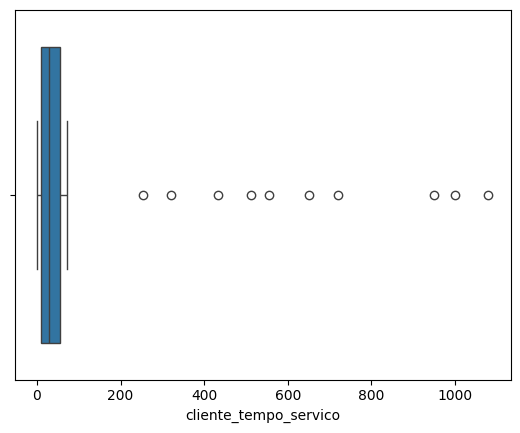

In [140]:
#tempo de serviço muito fora do esperado
sns.boxplot(x=df_sem_nulos['cliente_tempo_servico'])

In [137]:
#pegando primeiro quartil
Q1 = df_sem_nulos['cliente_tempo_servico'].quantile(.25)
Q3 = df_sem_nulos['cliente_tempo_servico'].quantile(.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superir = Q3 + 1.5 * IQR

In [138]:
outliers_index = (df_sem_nulos['cliente_tempo_servico'] < limite_inferior) | (df_sem_nulos['cliente_tempo_servico'] > limite_superir) 
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente_tempo_servico, Length: 7006, dtype: bool

In [139]:
#df_sem_nulos[(df_sem_nulos['cliente_tempo_servico'] < limite_inferior) | (df_sem_nulos['cliente_tempo_servico'] > limite_superir)]
df_sem_nulos[outliers_index]['cliente_tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente_tempo_servico, dtype: float64

## Substuituindo valores para outliers

In [129]:
df_sem_out = df_sem_nulos.copy()

In [131]:
df_sem_out[outliers_index]['cliente_tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente_tempo_servico, dtype: float64

In [135]:
df_sem_out.loc[outliers_index, 'cliente_tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index]['conta_cobranca_Total'] / df_sem_out.loc[outliers_index]['conta_cobranca_mensal']
)

<Axes: xlabel='cliente_tempo_servico'>

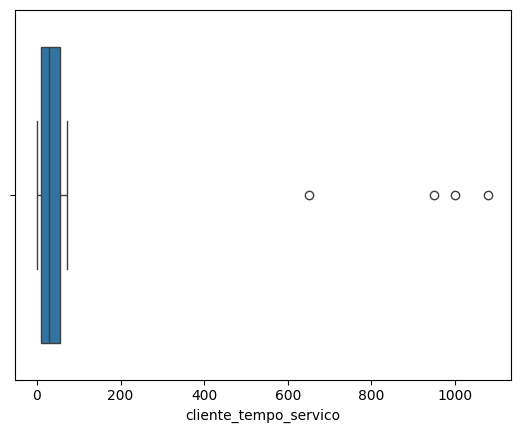

In [136]:
sns.boxplot(x=df_sem_out['cliente_tempo_servico'])

In [144]:
#pegando primeiro quartil
Q1 = df_sem_out['cliente_tempo_servico'].quantile(.25)
Q3 = df_sem_out['cliente_tempo_servico'].quantile(.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superir = Q3 + 1.5 * IQR

In [147]:
outliers_index = (df_sem_out['cliente_tempo_servico'] < limite_inferior) | (df_sem_out['cliente_tempo_servico'] > limite_superir) 
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente_tempo_servico, Length: 7006, dtype: bool

In [148]:
df_sem_out[outliers_index]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [149]:
df_sem_out = df_sem_out[~outliers_index]
df_sem_out

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente_tempo_servico'>

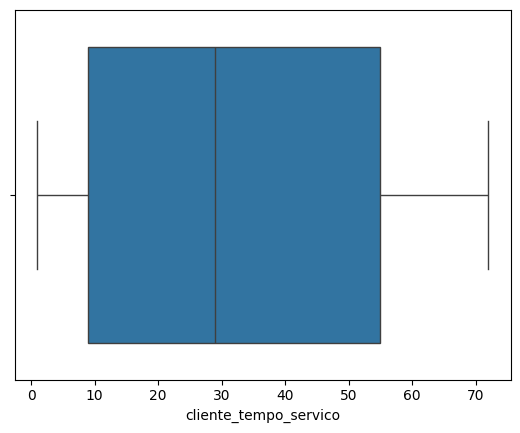

In [152]:
sns.boxplot(x=df_sem_out['cliente_tempo_servico'])

In [154]:
df_sem_out.reset_index(drop=True,inplace=True)
df_sem_out

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


## Trabalhando com variaveis categóricas

In [160]:
df_sem_id = df_sem_out.drop('id_cliente',axis=1).copy()
df_sem_id

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [159]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

In [165]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-' *30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente_genero
[0 1]
------------------------------
Coluna: cliente_idoso
[0 1]
------------------------------
Coluna: cliente_parceiro
[0 1]
------------------------------
Coluna: cliente_dependentes
[0 1]
------------------------------
Coluna: cliente_tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone_servico_telefone
[1 0]
------------------------------
Coluna: telefone_varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet_servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet_seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

In [162]:
colunas = ['conta_faturamente_eletronico', 'telefone_servico_telefone', 'cliente_dependentes', 'cliente_parceiro', 'cliente_genero', 'Churn']

In [164]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


## One Hot Encodder (Dummy) - preparo para envio de base para modelo ML transformando informações categorias em colunas boleanas

In [166]:
#exemplo
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [167]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [170]:
#tranforma todos dtype em numericos, facilitando o modelo
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7002 non-null   int64  
 1   cliente_genero                 7002 non-null   int64  
 2   cliente_idoso                  7002 non-null   int64  
 3   cliente_parceiro               7002 non-null   int64  
 4   cliente_dependentes            7002 non-null   int64  
 5   cliente_tempo_servico          7002 non-null   float64
 6   telefone_servico_telefone      7002 non-null   int64  
 7   telefone_varias_linhas         7002 non-null   object 
 8   internet_servico_internet      7002 non-null   object 
 9   internet_seguranca_online      7002 non-null   object 
 10  internet_backup_online         7002 non-null   object 
 11  internet_protecao_dispositivo  7002 non-null   object 
 12  internet_suporte_tecnico       7002 non-null   o

In [174]:
df_dummies = pd.get_dummies(df_sem_id, dtype = int).copy()
df_dummies

,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,conta_faturamente_eletronico,conta_cobranca_mensal,conta_cobranca_Total,...,internet_filmes_streaming_nao,internet_filmes_streaming_sem servico de internet,internet_filmes_streaming_sim,conta_contrato_dois anos,conta_contrato_mes a mes,conta_contrato_um ano,conta_metodo_pagamento_cartao de credito (automatico),conta_metodo_pagamento_cheque eletronico,conta_metodo_pagamento_cheque pelo correio,conta_metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


In [175]:
df_dummies.columns

Index(['Churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro',
       'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'conta_faturamente_eletronico',
       'conta_cobranca_mensal', 'conta_cobranca_Total',
       'telefone_varias_linhas_nao',
       'telefone_varias_linhas_sem servico de telefone',
       'telefone_varias_linhas_sim', 'internet_servico_internet_DSL',
       'internet_servico_internet_fibra otica',
       'internet_servico_internet_nao', 'internet_seguranca_online_nao',
       'internet_seguranca_online_sem servico de internet',
       'internet_seguranca_online_sim', 'internet_backup_online_nao',
       'internet_backup_online_sem servico de internet',
       'internet_backup_online_sim', 'internet_protecao_dispositivo_nao',
       'internet_protecao_dispositivo_sem servico de internet',
       'internet_protecao_dispositivo_sim', 'internet_suporte_tecnico_nao',
       'internet_suporte_tecnico_sem servico de internet',
     

In [176]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente_genero                                              7002 non-null   int64  
 2   cliente_idoso                                               7002 non-null   int64  
 3   cliente_parceiro                                            7002 non-null   int64  
 4   cliente_dependentes                                         7002 non-null   int64  
 5   cliente_tempo_servico                                       7002 non-null   float64
 6   telefone_servico_telefone                                   7002 non-null   int64  
 7   conta_faturamente_eletronico                                7002 non-null   int64  
 8 